Prophet는 Facebook에서 개발한 오픈 소스 시계열 데이터 예측 도구이다. 비정상적이고 결측치가 있는 데이터에 강하며, 주기적 패턴과 추세를 감지하는 데 효과적이다. Python과 R에서 사용할 수 있으며, 가장 큰 장점은 사용하기가 매우 쉽다. 


머신러닝, 딥러닝과 같은 인공지능 모델보다는 ARIMA와 같은 확률적 모형에 가깝다고 할 수 있고, 
다만 ARIMA 보다는 좀 더 도메인 지식(가정) 을 모델에 유연하게 입힐 수 있다. 

In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

df = pd.read_csv('climate.csv')

ts = df[['Date Time','T (degC)']]
ts.tail(10)

,Date Time,T (degC)
115691,14.03.2011 10:20:00,8.44
115692,14.03.2011 10:30:00,8.67
115693,14.03.2011 10:40:00,8.93
115694,14.03.2011 10:50:00,9.14
115695,14.03.2011 11:00:00,9.42
115696,14.03.2011 11:10:00,9.63
115697,14.03.2011 11:20:00,9.93
115698,14.03.2011 11:30:00,10.10
115699,14.03.2011 11:40:00,10.32
115700,14.03.2011 11:50:00,10.87


In [2]:
ts['Date Time'] = pd.to_datetime(ts['Date Time'])
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115701 entries, 0 to 115700
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date Time  115701 non-null  datetime64[ns]
 1   T (degC)   115701 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 MB


C:\Users\bmseo\AppData\Local\Temp\ipykernel_33660\351623169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Date Time'] = pd.to_datetime(ts['Date Time'])


In [ ]:
from prophet import Prophet

ts.index=pd.date_range(start='2009-01-01 00:10',  periods=len(ts), freq='10T')
ts.columns=['ds','y']  # prophet 패키지를 이용할때는 컬럼명을 이렇게 바꿔줘야함 : ds = 날짜컬럼 , y = 값 컬럼 // ds 컬럼의 형식은 무조건 datetime 이어야한다.

# model = Prophet(model_params)
 # AttributeError: 'Prophet' object has no attribute 'stan_backend' 발생시..→  Prophet.stan_backend = None 
model = Prophet(yearly_seasonality=True)  # Instantiate the model : 프로펫 모델은 처음에 instantiate 를 먼저 한번 해줘야함. instantiate 한번에 피팅 한번밖에 못함

# Prophet params : 프로펫의 다양한 사용가능 옵션들
# Example

# growth(values = c("linear", "logistic"))

# changepoint_num(range = c(10L, 50L), trans = NULL)
# changepoint_range(range = c(0.6, 0.9), trans = NULL)

# seasonality_yearly(values = c(TRUE, FALSE))
# seasonality_weekly(values = c(TRUE, FALSE))
# seasonality_daily(values = c(TRUE, FALSE))

# prior_scale_changepoints(range = c(-3, 2), trans = log10_trans())
# prior_scale_seasonality(range = c(-3, 2), trans = log10_trans())
# prior_scale_holidays(range = c(-3, 2), trans = log10_trans())

model.fit(ts) # fit the model

14:58:17 - cmdstanpy - INFO - Chain [1] start processing
14:59:10 - cmdstanpy - INFO - Chain [1] done processing


- 학습된 모델을 통한 예측
- future 데이터프레임은 기존에 ds 로 정의한 칼럼에, 예측하고자 하는 구간인 period 기간만큼을 연장해서 만들어줌

In [5]:
# Predict for five months in the furure
future = model.make_future_dataframe(periods = 5, freq = 'MS')  # 모델이 피팅한 데이터 (ts) 에 5개 주기만큼을 더한 시점데이터를 만듬
forecast = model.predict(future)

예측 결과에 대한 시각화. 예측값(점추정 + 구간추정) 과 실제값을 비교해서 시각화할 수 있고, 추세와 계절성에 대한 요소분해 결과도 볼 수 있다. 

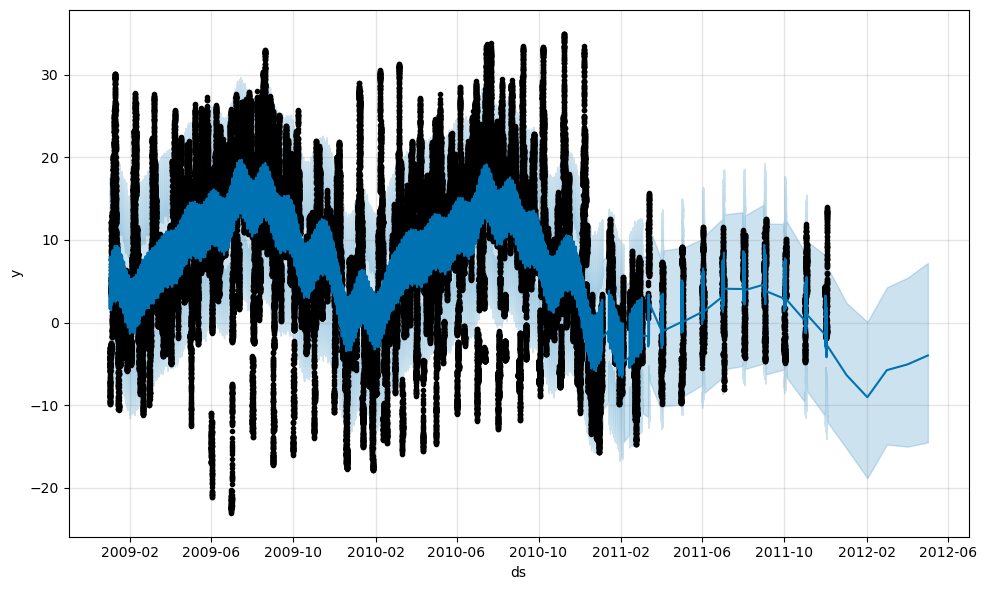

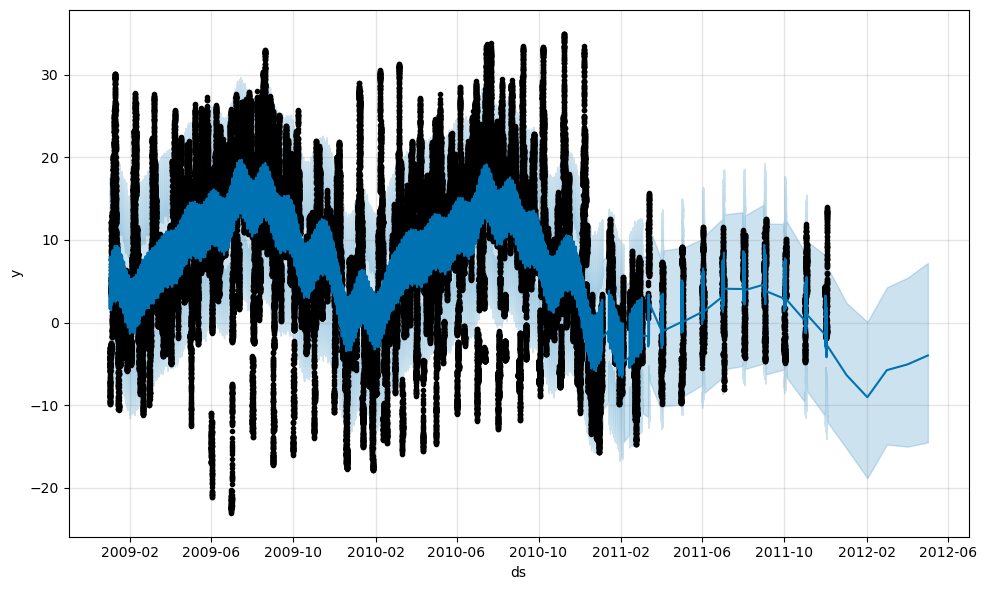

In [6]:
model.plot(forecast)

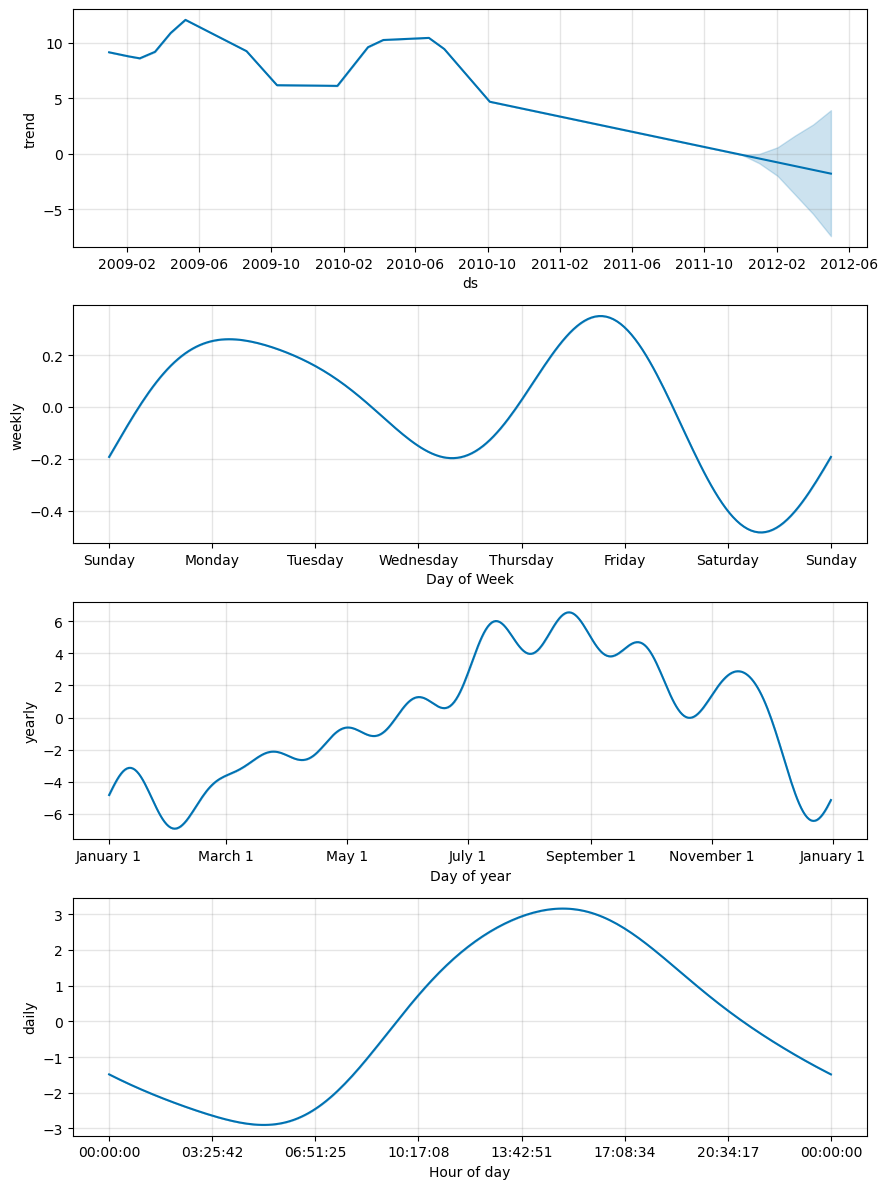

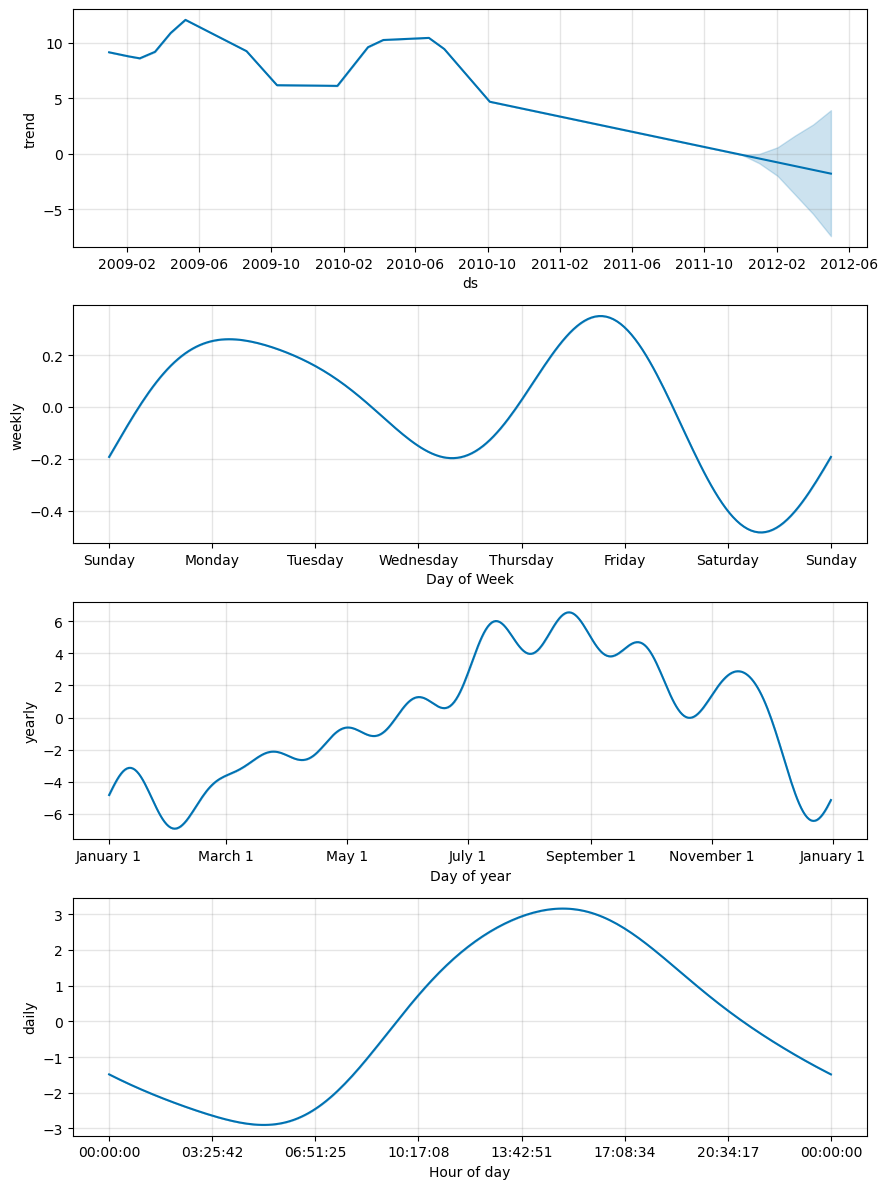

In [7]:
# plot the model forecast chart with component charts in trend and seasonality
model.plot_components(forecast)